In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import constants
import astropy.units as u
import pymoog
import rulerwd
import subprocess
import os
import re
import internal

MOOG_path = '{}/.pymoog/moog_nosm/moog_nosm_NOV2019/'.format(os.environ['HOME'])
MOOG_run_path = '{}/.pymoog/rundir/'.format(os.environ['HOME'])
internal_path = '/media/disk/my_writing/mingjie-workspace/source/he_abun/img/pymoog/'

# Kurucz line list to moog format

In [48]:
def kurucz2moog(kurucz_path):
    # gfall08oct17.dat
    kurucz_all = pd.read_fwf('files/linelist/kurucz/gfall08oct17.dat', colspecs=[(0,11), (11,18), (18,24), (24,36), (52,64), (93,98),  (109, 116)], names=['wavelength', 'loggf_init', 'ele', 'E(cm-1)_1', 'E(cm-1)_2', 'C6', 'hpf_frac'])
    kurucz_all['ele'] = kurucz_all['ele'] // 1 + kurucz_all['ele'] % 1 * 10 
    kurucz_all['EP_1'] = kurucz_all['E(cm-1)_1'] / (1/constants.h / constants.c).to(u.cm**-1 / u.eV).value
    kurucz_all['EP_2'] = kurucz_all['E(cm-1)_2'] / (1/constants.h / constants.c).to(u.cm**-1 / u.eV).value
    kurucz_all['EP'] = np.where((kurucz_all['EP_1'] <= kurucz_all['EP_2']), kurucz_all['EP_1'], kurucz_all['EP_2'])
    kurucz_all['loggf'] = kurucz_all['loggf_init'] + kurucz_all['hpf_frac']
    indices = (kurucz_all['ele'] % 1 <= 0.2) & ~np.isnan(kurucz_all['loggf']) & (kurucz_all['wavelength'] >= 200) & (kurucz_all['EP'] <= 50)    
    kurucz_use = kurucz_all.loc[indices, ['wavelength', 'ele', 'EP', 'loggf', 'C6']].reset_index(drop=True)
    kurucz_use['wavelength'] = kurucz_use['wavelength'] * 10
    kurucz_use['D0'] = np.nan
    kurucz_use['EW'] = np.nan
    # pymoog.line_data.save_linelist(linelist, 'files/linelist/kurucz/kurucz.list', wav_start=2000, wav_end=7e5)
    return kurucz_use

In [49]:
linelist = kurucz2moog('files/linelist/kurucz/gfall08oct17.dat')

In [50]:
pymoog.line_data.save_linelist(linelist, 'files/linelist/kurucz/kurucz.list', wav_start=2000, wav_end=7e5)
pymoog.line_data.save_linelist(linelist, 'files/linelist/kurucz/kurucz_winered.list', wav_start=9100, wav_end=13540)

In [37]:
linelist

,wavelength,ele,EP,loggf,C6,D0,EW
0,2000.007,22.1,3.941202,-4.903,-7.57,NaN,NaN
1,2000.009,22.1,4.008769,-2.199,-7.58,NaN,NaN
2,2000.016,23.1,4.612403,-4.460,-7.70,NaN,NaN
3,2000.034,28.2,22.125166,-4.352,-7.62,NaN,NaN
4,2000.040,24.1,7.942637,-4.298,-7.53,NaN,NaN
...,...,...,...,...,...,...,...
1805467,9999999.999,20.1,11.021035,-1.446,-7.05,NaN,NaN
1805468,9999999.999,26.0,7.571021,-1.333,-7.01,NaN,NaN
1805469,9999999.999,11.1,46.175844,-1.444,-7.10,NaN,NaN
1805470,9999999.999,18.1,26.916667,-1.512,-7.08,NaN,NaN


In [43]:
linelist = pd.read_fwf('files/linelist/kurucz/gfall08oct17.dat', colspecs=[(0,11), (11,18), (18,24), (24,36), (52,64), (93,98),  (109, 116)], names=['wavelength', 'loggf_init', 'ele', 'E(cm-1)_1', 'E(cm-1)_2', 'C6', 'hpf_frac'])
linelist['EP_1'] = linelist['E(cm-1)_1'] / (1/constants.h / constants.c).to(u.cm**-1 / u.eV).value
linelist['EP_2'] = linelist['E(cm-1)_2'] / (1/constants.h / constants.c).to(u.cm**-1 / u.eV).value
linelist['wavelength'] = linelist['wavelength'] * 10

In [9]:
len(linelist[~np.isnan(linelist['hp_E1']) & (linelist['hp_E1'] > 0)]) / len(linelist)

0.09423090828868796

In [44]:
linelist[(linelist['wavelength']>10825.2) & (linelist['wavelength']<10825.4)]

,wavelength,loggf_init,ele,E(cm-1)_1,E(cm-1)_2,C6,hpf_frac,EP_1,EP_2
1586719,10825.202,-4.105,56.00,30695.617,39930.790,-6.82,0.000,3.805771,4.950787
1586720,10825.213,-3.167,15.00,82484.970,73249.806,-6.87,0.000,10.226833,9.081818
1586721,10825.264,-9.373,26.02,190425.720,199660.840,-7.62,0.000,23.609780,24.754789
1586722,10825.299,-3.442,29.02,223200.870,232435.960,-7.73,0.000,27.673381,28.818386
1586723,10825.308,-0.791,23.00,34366.058,25131.002,-7.76,-2.584,4.260848,3.115847
1586724,10825.314,-0.791,23.00,34366.058,25131.002,-7.76,-1.470,4.260848,3.115847
1586725,10825.321,-0.791,23.00,34366.058,25131.002,-7.76,-0.630,4.260848,3.115847
1586726,10825.324,-0.791,23.00,34366.058,25131.002,-7.76,-2.174,4.260848,3.115847
1586727,10825.329,-0.791,23.00,34366.058,25131.002,-7.76,-1.274,4.260848,3.115847
1586728,10825.335,-0.791,23.00,34366.058,25131.002,-7.76,-0.771,4.260848,3.115847


# Effciency determination

In [134]:
%%timeit

s = pymoog.synth.synth(5000, 2.0, 0, 10800, 10810 + 20*4, 28000, line_list='vald_3000_11000')
s.prepare_file()
s.run_moog()
s.read_spectra()

4.51 s ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


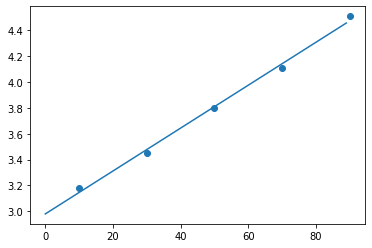

In [137]:
wav_length = np.arange(10, 100, 20)
time = [3.18, 3.45, 3.80, 4.11, 4.51]

plt.scatter(wav_length, time)
res = np.polyfit(wav_length, time, 1)
x = np.arange(0, 90, 1)
y = np.polyval(res, x)
plt.plot(x, y)

# Renewing VALD line list

In [17]:
import subprocess

In [131]:
# Download the VALD line list file
vald_request_number = 4203517
start_wav = 3000
name = 'vald_{}_{}'.format(start_wav, start_wav+500)
subprocess.run(['wget', 'http://vald.astro.uu.se/~vald/FTP/MingjieJian.{}.gz'.format(vald_request_number), '-O', 'files/linelist/vald/{}.gz'.format(name)])
subprocess.run(['gzip', '-d', 'files/linelist/vald/{}.gz'.format(name)])

CompletedProcess(args=['gzip', '-d', 'files/linelist/vald/vald_3000_3500.gz'], returncode=0)

In [98]:
start_wav = 3500
for start_wav in np.arange(4000, 24000, 500):
    pymoog.internal.vald2moog_format('files/linelist/vald/vald_{}_{}'.format(start_wav, start_wav+500), 
                                    'files/linelist/vald/vald_{}_{}.list'.format(start_wav, start_wav+500))

In [104]:
# Combine the sub-llinelists
for start_wav in np.arange(3500, 24000, 500):
    if start_wav == 3500:
        vald_list = pymoog.line_data.read_linelist('files/linelist/vald/vald_{}_{}.list'.format(start_wav, start_wav+500))
    else:
        vald_list = pd.concat([vald_list,
                               pymoog.line_data.read_linelist('files/linelist/vald/vald_{}_{}.list'.format(start_wav, start_wav+500))])
        
vald_list = vald_list.reset_index(drop=True)

In [125]:
pymoog.line_data.save_linelist(vald_list, 'files/linelist/vald/vald_winered.list', wav_start=9100, wav_end=13540)

In [126]:
pymoog.line_data.read_linelist('files/linelist/vald/vald_winered.list')

,wavelength,id,EP,loggf,C6,D0,EW
0,9100.029,26.00000,5.902,-2.812,-7.28,NaN,NaN
1,9100.054,28.10000,14.627,-2.108,-7.68,NaN,NaN
2,9100.059,26.00000,5.980,-5.497,-7.14,NaN,NaN
3,9100.104,28.10000,14.627,-3.413,-7.68,NaN,NaN
4,9100.159,108.00116,2.428,-11.597,0.00,4.456,NaN
...,...,...,...,...,...,...,...
150409,13539.876,26.00000,6.132,-3.791,-7.29,NaN,NaN
150410,13539.878,608.01316,5.554,-7.820,0.00,11.156,NaN
150411,13539.967,22.00000,5.204,-3.783,-7.32,NaN,NaN
150412,13539.980,608.01216,2.250,-7.763,0.00,11.156,NaN


In [113]:
vald_list

,wavelength,id,EP,loggf,C6,D0,EW
0,3500.011,608.01216,6.423,-4.069,0.00,11.156,NaN
1,3500.011,608.01216,6.423,-4.445,0.00,11.156,NaN
2,3500.036,606.01212,0.710,-5.193,0.00,6.408,NaN
3,3500.038,106.00113,0.555,-8.734,0.00,3.507,NaN
4,3500.045,25.10000,9.664,-5.153,-7.73,NaN,NaN
...,...,...,...,...,...,...,...
909210,23999.671,26.00000,6.691,-3.211,-7.43,NaN,NaN
909211,23999.867,608.01316,0.314,-7.349,0.00,11.156,NaN
909212,23999.879,26.00000,2.176,-12.479,-7.85,NaN,NaN
909213,23999.953,22.00000,4.693,-3.618,-7.55,NaN,NaN


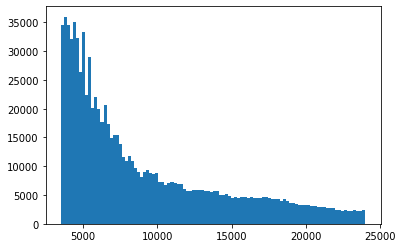

In [109]:
plt.hist(vald_list['wavelength'], bins=100);

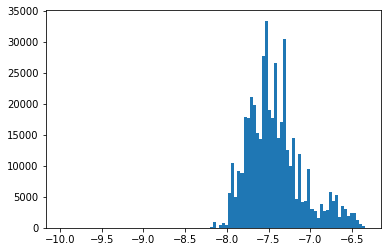

In [130]:
plt.hist(vald_list.loc[vald_list['C6']<0, 'C6'], bins=100);

# MARCS model

In [2]:
file = ! ls files/model/marcs/

In [3]:
path = 'files/model/marcs/' + file[0]
! extract path

'MARCS_MKK_20210509073507.tar'

In [4]:
pymoog.model.read_Kurucz_model('files/model/marcs/p2500_g+3.5_m0.0_t02_st_z-2.50_a+0.40_c+0.00_n+0.00_o+0.40_r+0.00_s+0.00.krz')

ValueError: invalid literal for int() with base 10: '-10.54'